In [ ]:
# bullseye
import pandas as pd
import numpy as np
import gwaslab as gl
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append('/Users/clu/git/3D_cardiac_GWAS/src')
import matplotlib as mpl
from bullseye import bullseye_plot, get_cmap_center

def bullseye_plot_select(hits_bygene, traits2plot, outputpath = None):
    # total genes to plot and set the number of rows and columns
    total_num_traits = len(traits2plot)
    num_cols = 5
    num_rows = total_num_traits // num_cols + 1

    # get the traits to plot
    # cols = [x for x in hits_bygene.columns if x.endswith('SIGNLOG10P')]
    cols = ['signedLogP_{}'.format(i) for i in range(1, 17)]

    # Make a figure and axes with dimensions as desired.
    fig, axes = plt.subplots(figsize=(16, num_rows*3), nrows=num_rows, ncols=num_cols, subplot_kw=dict(projection='polar'))
    fig.canvas.manager.set_window_title('Left Ventricle Bulls Eyes (AHA)')

    # Create the axis for the colorbars
    axl = fig.add_axes([0.3, 0.02, 0.5, 0.01])
    
    # Set the colormap and norm to correspond to the data for which
    # the colorbar will be used.
    cmap = get_cmap_center('RdBu_r', center=0, vmin=-15, vmax=15)
    norm = mpl.colors.Normalize(vmin=-15, vmax=15)
    # cmap = get_cmap_center('Reds', vmin=0, vmax=13, center=6.5)
    # norm = mpl.colors.Normalize(vmin=0, vmax=13)
    # Create an empty ScalarMappable to set the colorbar's colormap and norm.
    # The following gives a basic continuous colorbar with ticks and labels.
    fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
                cax=axl, orientation='horizontal', label='-log10(p-value)')

    for i, genename in enumerate(traits2plot):
        ax=axes[i//num_cols, i%num_cols]
        bullseye_plot(ax, hits_bygene.loc[genename][cols], cmap=cmap, norm=norm, #seg_bold=[5, 6, 11, 12, 16]
                      )
        ax.set_title(genename)
        # set title font size
        ax.title.set_fontsize(24)
        # ax.set_title('chr{:.0f}:{}'.format(hits_bygene.loc[genename]['CHROM'], genename))
    fig.tight_layout()
    return fig


/var/folders/6y/1p43n3zs7zn39bj64mc3fmmc0000gn/T/ipykernel_84156/1912461705.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


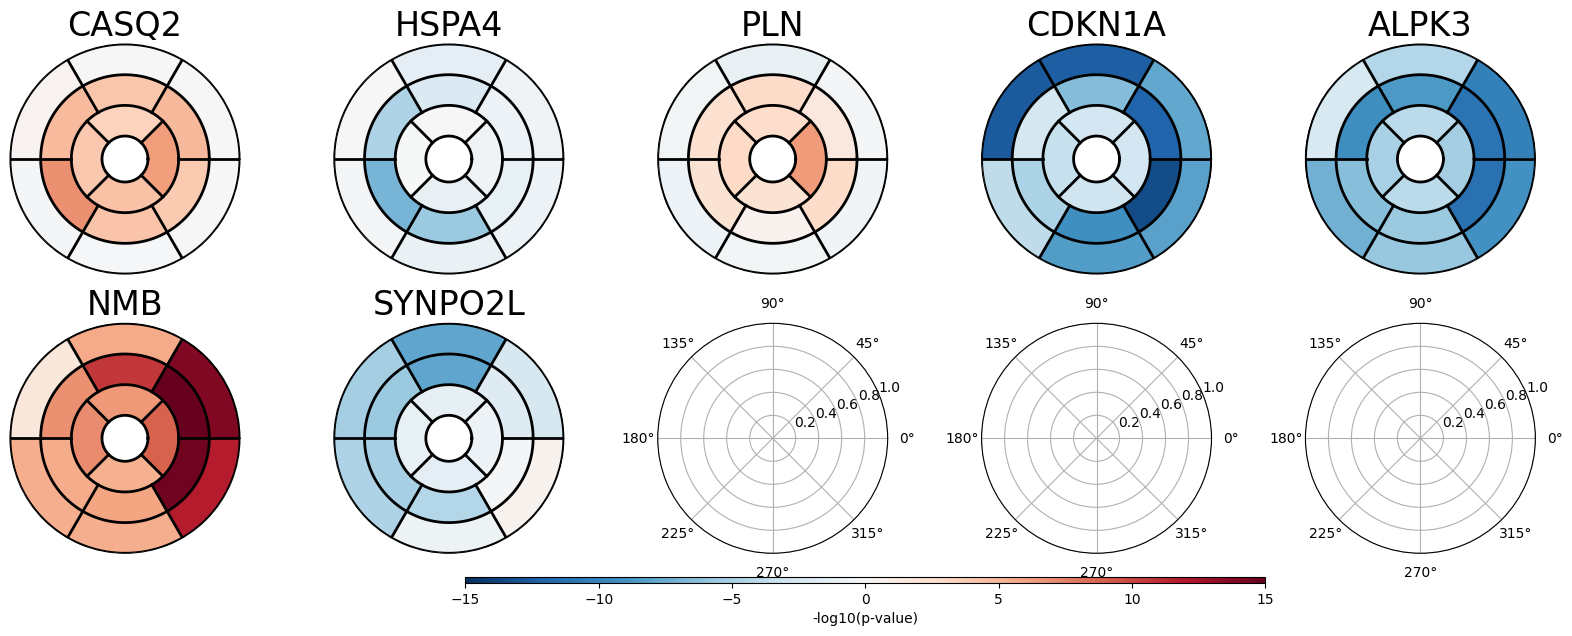

In [34]:

fig = bullseye_plot_select(twasall, ['CASQ2','HSPA4','PLN','CDKN1A','ALPK3','NMB','SYNPO2L'])
fig.savefig('/Users/clu/git/3D_cardiac_GWAS/the_paper/data/png/twas_WTbullseye.pdf')